<a href="https://colab.research.google.com/github/rakshitha1353/cat-and-dog-classification/blob/master/CatandDogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as pyplt
import tensorflow as tf

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("birajsth/cats-and-dogs-filtered")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/birajsth/cats-and-dogs-filtered/versions/1


In [ ]:
train_dir =  '/root/.cache/kagglehub/datasets/birajsth/cats-and-dogs-filtered/versions/1/cats_and_dogs_filtered/train'

validation_dir ='/root/.cache/kagglehub/datasets/birajsth/cats-and-dogs-filtered/versions/1/cats_and_dogs_filtered/validation'

In [ ]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val




In [ ]:
print('total training cat images:',num_cats_tr)
print('total training dog images:',num_dogs_tr)

print('total validation cat images:',num_cats_val)
print('total validation dog images:',num_dogs_val)
print('--')
print('total training images:',total_train)
print('total validation images:',total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
total training images: 2000
total validation images: 1000


In [ ]:
batch_size = 128
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
    fig, axes = pyplt.subplots(1, 5, figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    pyplt.tight_layout()
    pyplt.show()

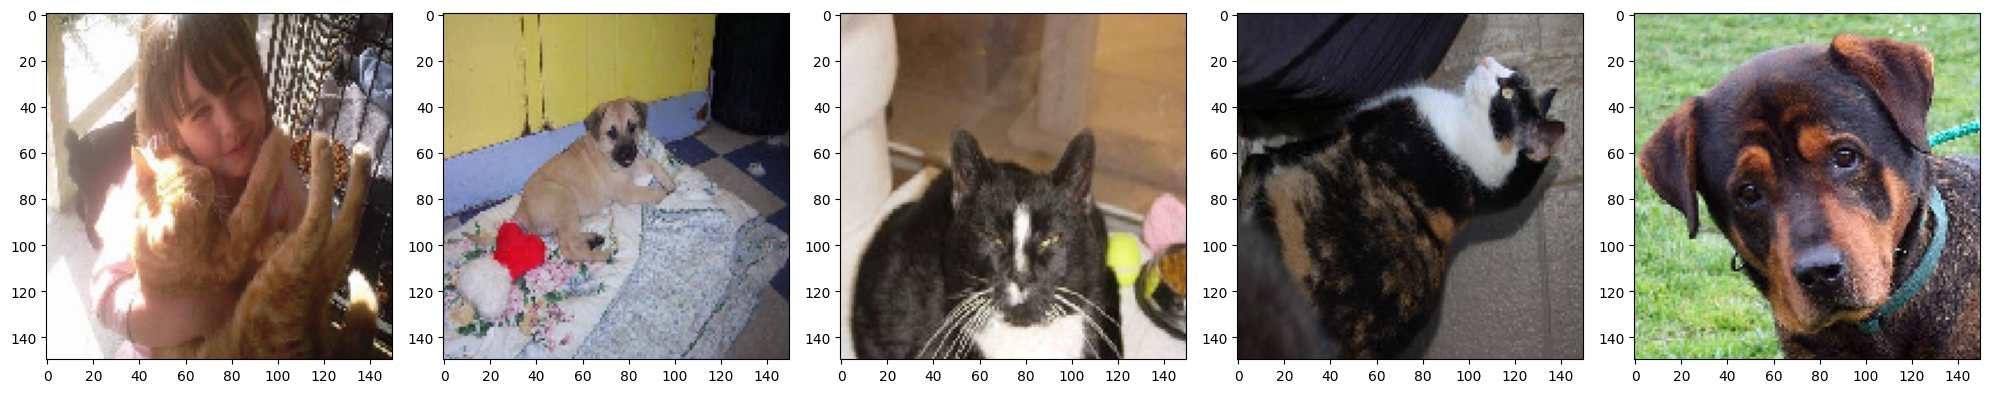

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,641,441 (40.59 MB)

 Trainable params: 10,641,441 (40.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
model.save('model.h5')

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.5182 - loss: 1.1727 - val_accuracy: 0.5033 - val_loss: 0.6920
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 580ms/step - accuracy: 0.5000 - loss: 0.6920 - val_accuracy: 0.4989 - val_loss: 0.6927
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.4932 - loss: 0.6926 - val_accuracy: 0.4989 - val_loss: 0.6838
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 632ms/step - accuracy: 0.5375 - loss: 0.6778 - val_accuracy: 0.5123 - val_loss: 0.6838
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.5013 - loss: 0.6744 - val_accuracy: 0.6551 - val_loss: 0.6546


In [ ]:
!pip install pydot

In [ ]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
model = tf.keras.models.load_model('model.h5')
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

frozen_func = convert_variables_to_constants_v2(full_model)

input_node_name = full_model.inputs[0].name.split(':')[0]
output_node_name = full_model.outputs[0].name.split(':')[0]
print("Input node name:",input_node_name)
print("Output node name:",output_node_name)

graph_def = frozen_func.graph.as_graph_def()
graph_def = tf.compat.v1.graph_util.remove_training_nodes(graph_def)
graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(None, graph_def, [output_node_name])

tf.io.write_graph(graph_def,'.','model.xml',as_text=True)


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Input node name: x
Output node name: Identity


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


'./model.xml'

In [ ]:
graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(None, graph_def, [output_node_name])


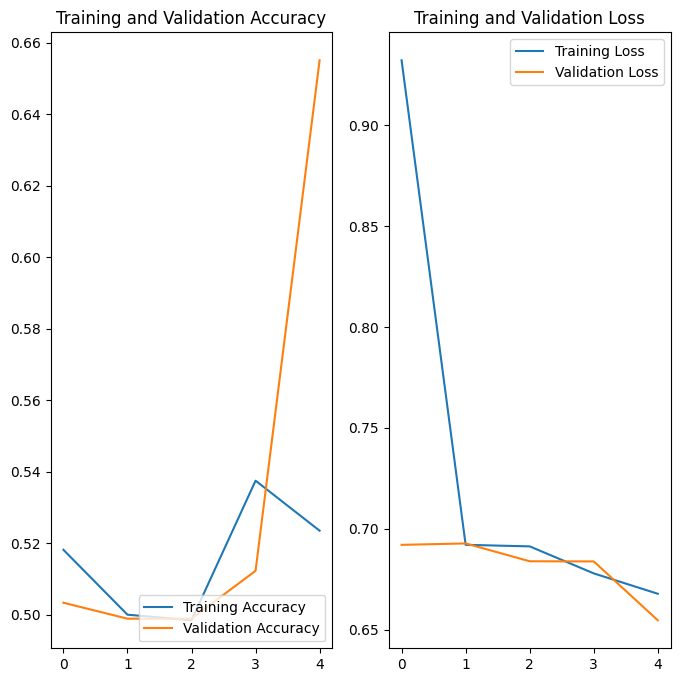

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.models import load_model

import cv2
import numpy as np

img = cv2.imread("/content/dog.jpg")
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])



In [ ]:
yhat=model.predict(img)
i = 0
if(yhat >=0.5):
  print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Dog
